<a href="https://colab.research.google.com/github/Vkavyasree732/Repository1/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img.view(-1, 28*28))

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [ ]:
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    for real_imgs, _ in train_loader:
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        d_optimizer.zero_grad()
        outputs = discriminator(real_imgs)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, 100).to(device) # Move z to the device
        fake_imgs = generator(z)
        outputs = discriminator(fake_imgs.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        d_optimizer.step()

        g_optimizer.zero_grad()
        outputs = discriminator(fake_imgs)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

torch.save(generator.state_dict(), "generator.pth")

Epoch [1/50], D Loss: 0.0342, G Loss: 4.9586
Epoch [2/50], D Loss: 0.1929, G Loss: 8.1079
Epoch [3/50], D Loss: 0.3834, G Loss: 5.2651
Epoch [4/50], D Loss: 0.9801, G Loss: 2.9611
Epoch [5/50], D Loss: 2.0192, G Loss: 1.3882
Epoch [6/50], D Loss: 1.9786, G Loss: 1.7558
Epoch [7/50], D Loss: 1.2010, G Loss: 1.1771
Epoch [8/50], D Loss: 1.0972, G Loss: 1.8281
Epoch [9/50], D Loss: 0.7315, G Loss: 1.6801
Epoch [10/50], D Loss: 0.7596, G Loss: 2.0454
Epoch [11/50], D Loss: 0.7603, G Loss: 3.0284
Epoch [12/50], D Loss: 0.3216, G Loss: 3.2382
Epoch [13/50], D Loss: 0.3937, G Loss: 5.7924
Epoch [14/50], D Loss: 0.6783, G Loss: 3.3793
Epoch [15/50], D Loss: 0.5109, G Loss: 2.9590
Epoch [16/50], D Loss: 0.7049, G Loss: 4.4783
Epoch [17/50], D Loss: 0.8713, G Loss: 6.0184
Epoch [18/50], D Loss: 0.7812, G Loss: 4.4815
Epoch [19/50], D Loss: 0.2436, G Loss: 6.6270
Epoch [20/50], D Loss: 0.1793, G Loss: 5.3309
Epoch [21/50], D Loss: 0.4742, G Loss: 6.9366
Epoch [22/50], D Loss: 0.3647, G Loss: 6.95

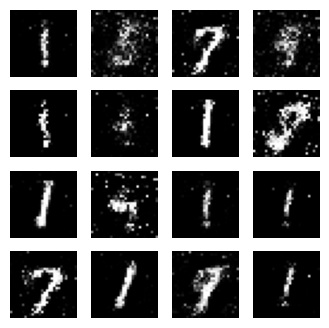

In [ ]:
z = torch.randn(16, 100).to(device)
generated_imgs = generator(z).detach().cpu().numpy()

def show_images(images):
    fig, axes = plt.subplots(4, 4, figsize=(4, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.show()

show_images(generated_imgs)

**1. Why is Binary Cross-Entropy (BCE) Loss used in GAN training?**

BCE Loss is used because the discriminator is a binary classifier (real vs. fake).

It provides smooth gradient updates, ensuring stable training.

The discriminator outputs probabilities (0 to 1), making BCE a natural choice.

**2. How does the generator improve during training? What challenges arise?**

**How the Generator Improves:**

The generator produces fake images and tries to fool the discriminator.

It learns from the discriminator’s feedback and improves over time.

**Challenges in GAN Training:**

Mode Collapse: The generator produces limited image variety (e.g., only one digit).

Vanishing Gradients: The discriminator gets too strong, and the generator stops learning.

Training Instability: GANs require a balance between the generator and discriminator.

**3. How to Improve Generated Images?**

Use CNN-based GANs (DCGANs): Better spatial structure.

Train for more epochs (100-200): Sharper images.

Use WGAN Loss: More stable training.

Apply Label Smoothing: Reduces overconfidence in discriminator.